<a href="https://colab.research.google.com/github/ghaissa/deepL/blob/main/PredictionPriceHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from keras.models import Sequential #initialisation de mon ANN
from keras.layers import Dense # pour nous donner le nombre des layers, neurone par layer et fonction d'activa
from sklearn.model_selection import train_test_split #pour diviser data training et test 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import pandas as pd


In [50]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [51]:
df = pd.read_csv('housepricedata.csv')
df.head(7) #afficher les 7 premiers lignes du data 

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [52]:
#convertit la base en array 
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [53]:
#diviser la data set en des dependants et des independants sets 
x = dataset[:, 0:10] #je veux toutes les lignes et les colonnes de index de 0 à 10 ([0,1) )
y = dataset[:,10] #toutes les lignes et la derniere colonne 


In [54]:

#je veux utiliser la methode min/max scalaire from preprocessing (pré-traitement)
#tous les features entre 0 et 1 inclus
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [55]:
#deviser la data to 80% training and 20% (testing 10% et validating 10%)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.8)
# training set a 17290 points data par contre validation et test set ont 864 point data chacune. 
#X variabeles a 10 input features, and Y a juste 1 feature  
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1168, 10) (58, 10) (234, 10) (1168,) (58,) (234,)


In [56]:

# cree notre modele et l'architectures de deep learning network 
model = Sequential() #initialiser ANN
model.add(Dense(units=32, activation='relu', input_dim=10))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [57]:
#mesurer comment le modele fait en training et essayer d'ameliorer en utilisant optimazier
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']
) 

In [58]:
#train the model 
hist = model.fit(
    X_train, Y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, Y_val)
)

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5205 - val_loss: 0.6894 - val_accuracy: 0.5517
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5497 - val_loss: 0.6832 - val_accuracy: 0.6034
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5993 - val_loss: 0.6769 - val_accuracy: 0.6207
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6062 - val_loss: 0.6705 - val_accuracy: 0.6724
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6010 - val_loss: 0.6642 - val_accuracy: 0.7069
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6550 - val_loss: 0.6574 - val_accuracy: 0.7931
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.7080 - val_loss: 0.6497 - val_accuracy: 0.8103
Epoch 8/100
3

In [59]:
model.evaluate(X_test, Y_test)[1]

8/8 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9103


0.9102563858032227

In [62]:
prediction=model.predict(X_test)
prediction = [1 if y>=.87 else 0 for y in prediction]
print(prediction)
print(Y_test)

[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
[1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0

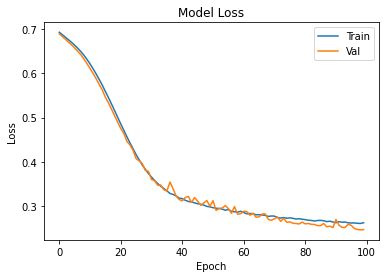

In [63]:
#visualisé training loss et validation loss pour verifier si le model est overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')



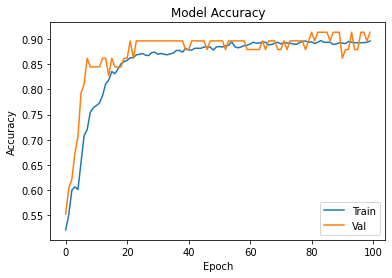

In [65]:
#visualisé training accuracy et validation accuracy pour verifier si le model est overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
